# <u>LENDING CLUB CASE-STUDY:</u> 

##### <u>Problem Statement</u>:
A largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures needs to identify risky loan applicants.

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If we are able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

##### Use-Case presenters:
    1. Shweta Rao: Group Facilitator
    2. Pragadeesh S: Group Memeber
---

In [1]:
# import required variables
import pandas as pd
import numpy as np
import re
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#### Data Understanding:
 
Dataset contains the complete loan data for all loans issued through the time period 2007 to 2011. Rejected Loans are not considered in the dataset.

In [2]:
# read data
df=pd.read_csv(r'C:\Users\sprag\Documents\PG-AIML\Lending-club-case-study\loan\loan.csv',low_memory=False)

In [3]:
# check dataframe shape
df.shape

(39717, 111)

The Dataset consists of 39717 Records and 111 Attributes.

### Cleaning the Dataset:
Deteting the loan behavioural variables.
##### Loan Behavioural variables: 
These Variables define the methods/patterns of a loan payment behaviour of a customer which is after approval of loan and it is not useful in analysing the Defaulters which has to done before approval of loan.
<ul>
<li>delinq_2yrs</li>
<li>earliest_cr_line</li>
<li>inq_last_6mths</li>
<li>open_acc</li>
<li>pub_rec</li>
<li>revol_bal</li>
<li>revol_util</li>
<li>total_acc</li>
<li>out_prncp</li>
<li>out_prncp_inv</li>
<li>total_pymnt</li>
<li>total_pymnt_inv</li>
<li>total_rec_prncp</li>
<li>total_rec_int</li>
<li>total_rec_late_fee</li>
<li>recoveries</li>
<li>collection_recovery_fee</li>
<li>last_pymnt_d</li>
<li>last_pymnt_amnt</li>
<li>last_credit_pull_d</li>
<li>application_type</li>
</ul>

In [4]:
beh_vars = ['application_type', 'collection_recovery_fee', 'delinq_2yrs', 'earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'inq_last_6mths', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee']

In [5]:
# Removing Behavioural variables
df = df.drop(beh_vars, axis=1)

In [6]:
# check null values in each column
pd.options.display.max_rows = 150
df.isnull().sum().loc[df.isnull().sum()>0]

emp_title                          2459
emp_length                         1075
desc                              12940
title                                11
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
collections_12_mths_ex_med           56
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717


In [7]:
# Deleting columns having more than 50% null values.
df = df.loc[:, (df.isnull().sum(axis=0) <= df.shape[0]/2)]

In [8]:
# Checking shape after deleting columns
df.shape

(39717, 33)

In [9]:
# Checking null values again after deleting columns
df.isnull().sum().loc[df.isnull().sum()>0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [10]:
# checking dataset
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(df)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"I plan to consolidate over $7,000 of debt: a c...",debt_consolidation,Consolidation Loan,027xx,MA,14.29,f,NaN,1,0,NaN,0,NaN,NaN


In [11]:
# Checking info of the dataset, especially for the columns with null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [12]:
# check number of unique values in each column
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
title                       

In [13]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [14]:
#removing Current loan status as this is not required for analysing defaulters.
df = df[df['loan_status']!= 'Current']

###### Columns with only one value:
These columns have only one unique value. It has no variance and its not useful for analysis.
<ul>
<li>tax_liens</li>
<li>delinq_amnt</li>
<li>chargeoff_within_12_mths</li>
<li>acc_now_delinq</li>
<li>policy_code</li>
<li>collections_12_mths_ex_med</li>
<li>initial_list_status</li>
<li>pymnt_plan</li>
</ul>

In [15]:
no_var = ['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan']

In [16]:
# Removing variables with no variance
df = df.drop(no_var, axis=1)

From the Data Dictionary and by looking at the info above, we can drop some of the columns which are not useful for analysis.
<ul>
<li>'id' and 'member_id' is just an identification number which has no value for analysis.</li>
<li>'url' is a link that has no value for analysis.</li>
<li>'desc' is the description text which is not useful for analysis.</li>
<li>'emp_title' and 'title' are names which is also identifier that has no value for analysing patterns for defaulters.</li>
<li>'zip_code' represents state which we have a separate variable 'addr_state', also zip code has XX in them.</li>
</ul>

In [17]:
drop_vars = ['id', 'member_id', 'url', 'desc', 'emp_title', 'title', 'zip_code']

In [18]:
# Removing variables which are not useful for analysis
df = df.drop(drop_vars, axis=1)

In [19]:
# Checking null values again after deleting columns
df.isnull().sum().loc[df.isnull().sum()>0]

emp_length              1033
pub_rec_bankruptcies     697
dtype: int64

In [20]:
# Less than 5% of the records only have null values
# Dropping rows with null values
df = df.dropna(subset=['emp_length','pub_rec_bankruptcies'])

In [21]:
# Checking shape after deleting
df.shape

(36847, 18)

In [22]:
# Checking info after deleting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36847 non-null  int64  
 1   funded_amnt           36847 non-null  int64  
 2   funded_amnt_inv       36847 non-null  float64
 3   term                  36847 non-null  object 
 4   int_rate              36847 non-null  object 
 5   installment           36847 non-null  float64
 6   grade                 36847 non-null  object 
 7   sub_grade             36847 non-null  object 
 8   emp_length            36847 non-null  object 
 9   home_ownership        36847 non-null  object 
 10  annual_inc            36847 non-null  float64
 11  verification_status   36847 non-null  object 
 12  issue_d               36847 non-null  object 
 13  loan_status           36847 non-null  object 
 14  purpose               36847 non-null  object 
 15  addr_state         

In [23]:
# checking dataset
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(df)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39666,15450,15450,600.0,36 months,11.22%,507.46,C,C4,2 years,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,VA,13.50,1.0
39680,3000,3000,525.0,36 months,11.86%,99.44,D,D1,2 years,MORTGAGE,36153.0,Not Verified,Aug-07,Fully Paid,debt_consolidation,IN,7.47,1.0


In [24]:
# Checcking loan_amnt, funded_amnt, funded_amnt_inv
df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,36847.000000,36847.000000,36847.000000
mean,11141.327652,10872.924526,10430.400856
std,7369.988994,7109.330771,7008.919431
min,500.000000,500.000000,0.000000
25%,5500.000000,5400.000000,5000.000000
50%,10000.000000,9600.000000,9000.000000
75%,15000.000000,15000.000000,14335.044685
max,35000.000000,35000.000000,35000.000000


'loan_amnt', 'funded_amnt', 'funded_amnt_inv' looks statistically same. Removing redundent values and using loan_amount for analysis.

In [25]:
# removing funded_amnt, funded_amnt_inv
df = df.drop(['funded_amnt', 'funded_amnt_inv'], axis = 1)

Some of the columns with numerical values has strings / symbols in them, like column 'term' has string 'months' in them which is not required. <br> <br>
Cleaning up columns:
<li> From 'term' removing 'months'</li>
<li> From 'int_rate' removing '%'</li>
<li> From 'emp_length' removing 'years'</li>


In [26]:
# Removing string 'month' from term column and converting to int type
df['term'] = df['term'].str.replace(r' months', '').astype(np.int64)

In [27]:
# Removing '%' symbol from int_rate convert to float type
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(np.float64)

In [28]:
# Removing 'Years' and extracting only numbers from emp_length
df['emp_length'][df['emp_length'] == '< 1 year'] = '0.5'
df['emp_length']=df.emp_length.str.extract('(\d+\.\d+|\d+)').astype(np.float64)

Extracting month and year as separate columns for 'issue_d'

In [29]:
# Converting to datetime formate
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [30]:
# separating month and year for date columns
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year

In [31]:
# dropping original date columns
df = df.drop('issue_d', axis = 1)

In [32]:
# check info for cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36847 non-null  int64  
 1   term                  36847 non-null  int64  
 2   int_rate              36847 non-null  float64
 3   installment           36847 non-null  float64
 4   grade                 36847 non-null  object 
 5   sub_grade             36847 non-null  object 
 6   emp_length            36847 non-null  float64
 7   home_ownership        36847 non-null  object 
 8   annual_inc            36847 non-null  float64
 9   verification_status   36847 non-null  object 
 10  loan_status           36847 non-null  object 
 11  purpose               36847 non-null  object 
 12  addr_state            36847 non-null  object 
 13  dti                   36847 non-null  float64
 14  pub_rec_bankruptcies  36847 non-null  float64
 15  issue_d_month      

In [33]:
# checking dataset
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(df)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,5000,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0.0,12,2011
1,2500,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39666,15450,36,11.22,507.46,C,C4,2.0,MORTGAGE,40000.0,Not Verified,Charged Off,debt_consolidation,VA,13.50,1.0,8,2007
39680,3000,36,11.86,99.44,D,D1,2.0,MORTGAGE,36153.0,Not Verified,Fully Paid,debt_consolidation,IN,7.47,1.0,8,2007


### Exploratory Data Analysis(EDA): 
#### Descriptive statistics:

In [34]:
# checking descriptive stats of the dataset
df.annual_inc.astype(np.int64)

0        24000
1        30000
2        12252
3        49200
5        36000
         ...  
39562    35000
39573    63500
39623    39000
39666    40000
39680    36153
Name: annual_inc, Length: 36847, dtype: int64

#### Analysis:

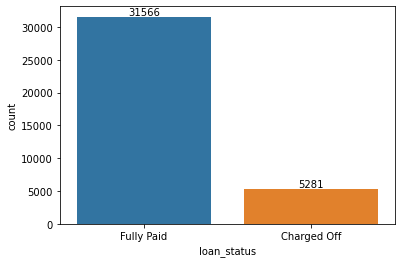

In [35]:
# checking Loan_status count
ax=sns.countplot(x='loan_status', data=df)
for container in ax.containers:
    ax.bar_label(container)

In [36]:
df.loan_status.value_counts(normalize=True)

Fully Paid     0.856678
Charged Off    0.143322
Name: loan_status, dtype: float64

Approximately, 14.33% of loans are <b>defaulted/charged_off</b> 

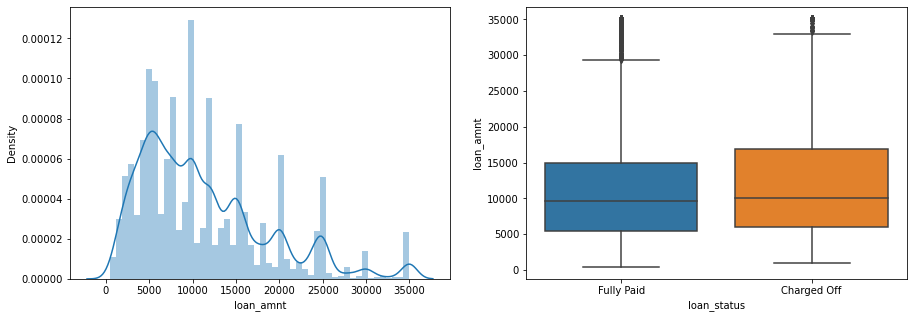

In [37]:
# Analysing loan amount
fig, axs = plt.subplots(ncols=2,sharex=False, figsize=(15,5))
ax1=sns.distplot(df['loan_amnt'], ax=axs[0])
ax2=sns.boxplot(x='loan_status',y='loan_amnt',data=df, ax=axs[1])


<li>loan_amnt distribution is slightly right-skewed as mean is greater than median as shown in the descriptive statistics.<br>
<li>Most of the loan_amnt are below 15000 - 3rd Quartile. charged off has a slightly greater loan_amnt at 3rd Quartile.

In [38]:
df_plot = df[df['loan_status']=='Charged Off']

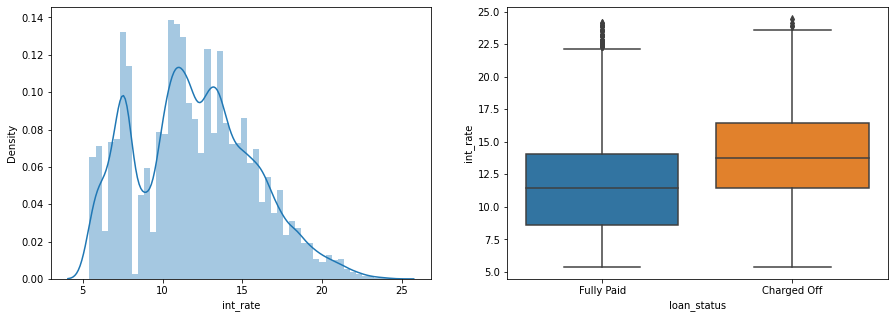

In [39]:
# Analysing loan status
fig, axs = plt.subplots(ncols=2,sharex=False, figsize=(15,5))
ax1=sns.distplot(df['int_rate'], ax=axs[0])
ax2=sns.boxplot(y='int_rate', x='loan_status', data=df, ax=axs[1])

For Fully paid loans the interest rate are comparitively lower when compared to charged off.<br>
Thus, Charging lower interest rate might have less chances of getting charged-off.

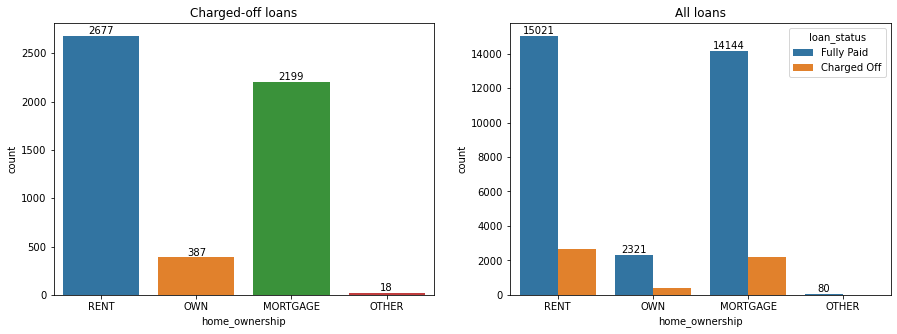

In [40]:
# Analysing home_ownership
fig, axs = plt.subplots(ncols=2,sharex=True, figsize=(15,5))
axs[0].set_title('Charged-off loans')
axs[1].set_title('All loans')
ax1=sns.countplot(x='home_ownership', data=df_plot, ax=axs[0])
ax2=sns.countplot(x='home_ownership', hue='loan_status', data=df, ax=axs[1])
for c1,c2 in zip(ax1.containers, ax2.containers):
    ax1.bar_label(c1)
    ax2.bar_label(c2)

In [41]:
df_plot.home_ownership.value_counts(normalize=True)

RENT        0.506912
MORTGAGE    0.416398
OWN         0.073282
OTHER       0.003408
Name: home_ownership, dtype: float64

In [42]:
df.home_ownership.value_counts(normalize=True)

RENT        0.480310
MORTGAGE    0.443537
OWN         0.073493
OTHER       0.002660
Name: home_ownership, dtype: float64

91% of Charged_off customers are with RENT and MORTGAGED home.<br>
Out of total applicants, 92% are with RENT and MORTGAGED home.<br>
There is a fair chance that applicants with home_ownership as RENT or MORTGAGED getting defaulted.

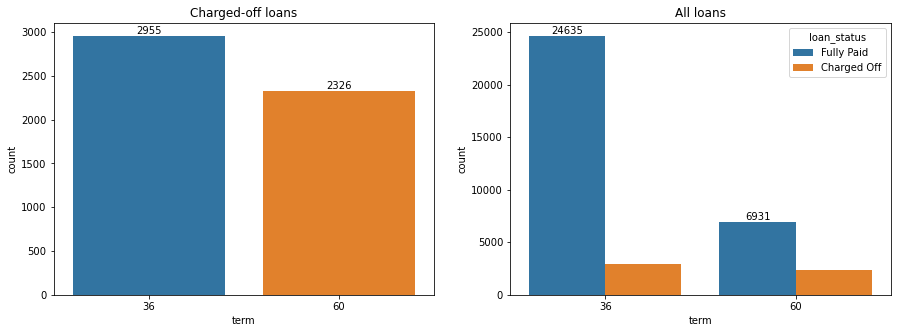

In [43]:
# Analysing term
fig, axs = plt.subplots(ncols=2,sharex=True, figsize=(15,5))
axs[0].set_title('Charged-off loans')
axs[1].set_title('All loans')
ax1=sns.countplot(x='term', data=df_plot, ax=axs[0])
ax2=sns.countplot(x='term', hue='loan_status', data=df, ax=axs[1])
for c1,c2 in zip(ax1.containers, ax2.containers):
    ax1.bar_label(c1)
    ax2.bar_label(c2)

In [44]:
df_plot.term.value_counts(normalize=True)

36    0.559553
60    0.440447
Name: term, dtype: float64

In [45]:
df.term.value_counts(normalize=True)

36    0.748772
60    0.251228
Name: term, dtype: float64

75% of the total loans are with 36 months tenure<br>
The number of defaulters for both the tenure are almost similar, but consitering the total number of loans the ratio of charged-off loans and fully paid loans are high for 60 months term.

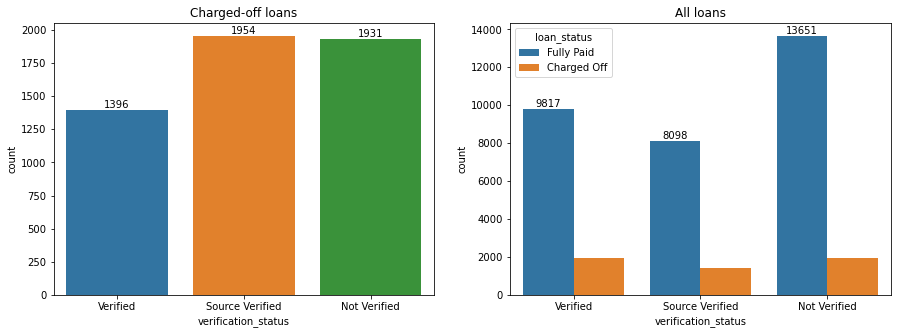

In [46]:
# Analysing verification_status
fig, axs = plt.subplots(ncols=2,sharex=True, figsize=(15,5))
axs[0].set_title('Charged-off loans')
axs[1].set_title('All loans')
ax1=sns.countplot(x='verification_status', data=df_plot, ax=axs[0])
ax2=sns.countplot(x='verification_status', hue='loan_status', data=df, ax=axs[1])
for c1,c2 in zip(ax1.containers, ax2.containers):
    ax1.bar_label(c1)
    ax2.bar_label(c2)

In [47]:
df_plot.verification_status.value_counts(normalize=True)

Verified           0.370006
Not Verified       0.365650
Source Verified    0.264344
Name: verification_status, dtype: float64

In [48]:
df.verification_status.value_counts(normalize=True)

Not Verified       0.422884
Verified           0.319456
Source Verified    0.257660
Name: verification_status, dtype: float64

Almost all the varified status have same values of charged of loans.<br>
Thus, varification status might not have much effect on defaulters.

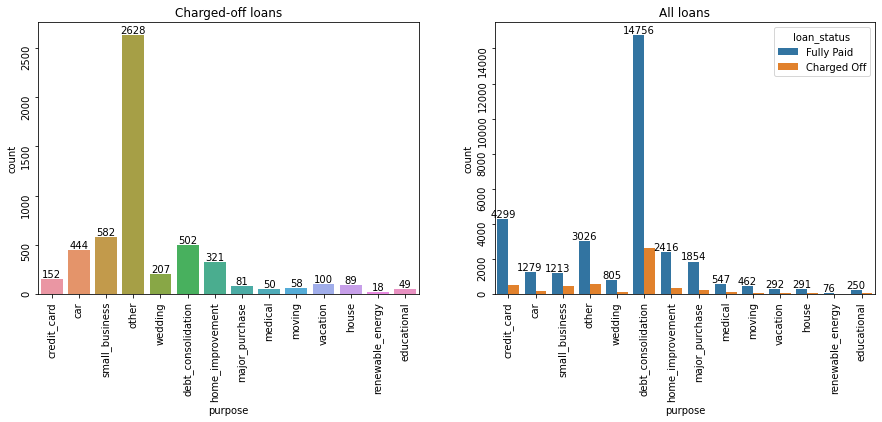

In [49]:
# Analysing purpose
fig, axs = plt.subplots(ncols=2,sharex=True, figsize=(15,5))
axs[0].set_title('Charged-off loans')
axs[1].set_title('All loans')
ax1=sns.countplot(x='purpose', data=df_plot, ax=axs[0])
ax2=sns.countplot(x='purpose', hue='loan_status', data=df, ax=axs[1])
for c1,c2 in zip(ax1.containers, ax2.containers):
    ax1.bar_label(c1)
    ax2.bar_label(c2)
axs[0].tick_params(labelrotation=90)
axs[1].tick_params(labelrotation=90)

In [50]:
df_plot.purpose.value_counts(normalize=True)

debt_consolidation    0.497633
other                 0.110206
credit_card           0.095058
small_business        0.084075
home_improvement      0.060784
major_purchase        0.039197
car                   0.028782
medical               0.018936
wedding               0.016853
moving                0.015338
house                 0.010983
vacation              0.009468
educational           0.009279
renewable_energy      0.003408
Name: purpose, dtype: float64

Many applicants are getting loans for the purpose of debt_consolidation.<br>
Around 50% of the charged_off customers are getting loan for the purpose of debt_consolidation

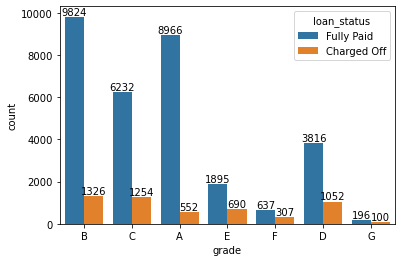

In [51]:
# Analysing grade
ax=sns.countplot(x='grade',hue='loan_status', data=df)
for container in ax.containers:
    ax.bar_label(container)

In [52]:
df_plot.grade.value_counts(normalize=True)

B    0.251089
C    0.237455
D    0.199205
E    0.130657
A    0.104526
F    0.058133
G    0.018936
Name: grade, dtype: float64

Grades B & C has almost 25% of defaulters for each grades.<br>
Grades F & G, the number of loans are less but more than 50% of them are defaulted

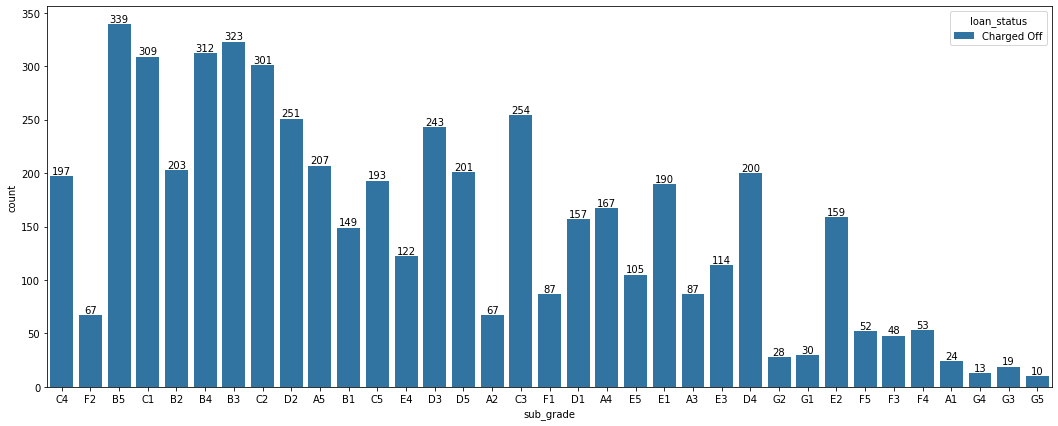

In [53]:
# Analysing sub_grade
plt.figure(figsize=(18,7))
ax=sns.countplot(x='sub_grade',hue='loan_status', data=df_plot)
for container in ax.containers:
    ax.bar_label(container)

From grade analysis, we know that A & B have many loans and B & C have high defaulter rate.<br>
Sub_groups B3,B4,B5,C1,C2 have high defaulter rate.

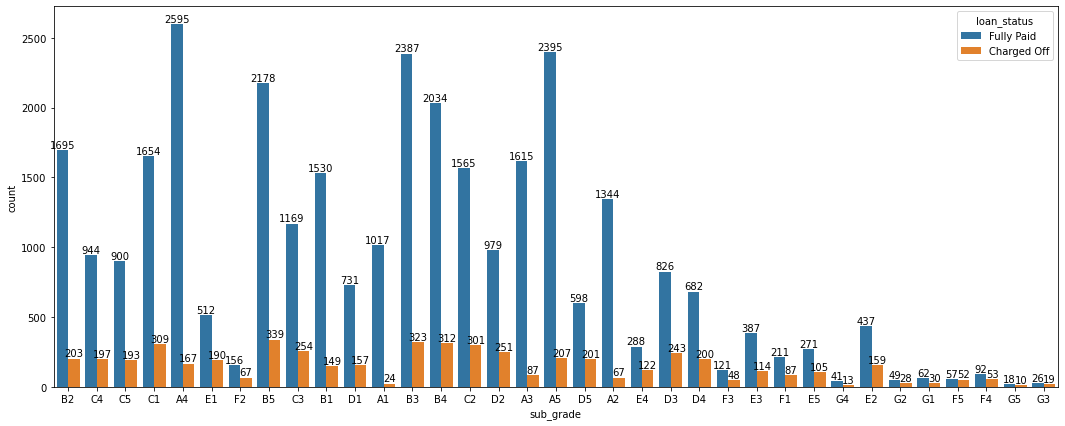

In [54]:
plt.figure(figsize=(18,7))
ax1=sns.countplot(x='sub_grade',hue='loan_status', data=df)
for container in ax1.containers:
    ax1.bar_label(container)

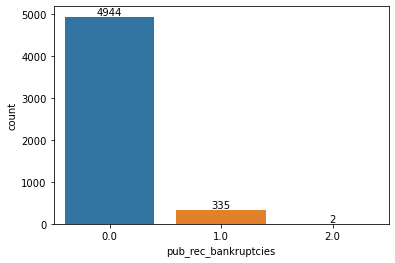

In [55]:
# Analysing pub_rec_bankruptcies
ax=sns.countplot(x='pub_rec_bankruptcies', data=df_plot)
for container in ax.containers:
    ax.bar_label(container)

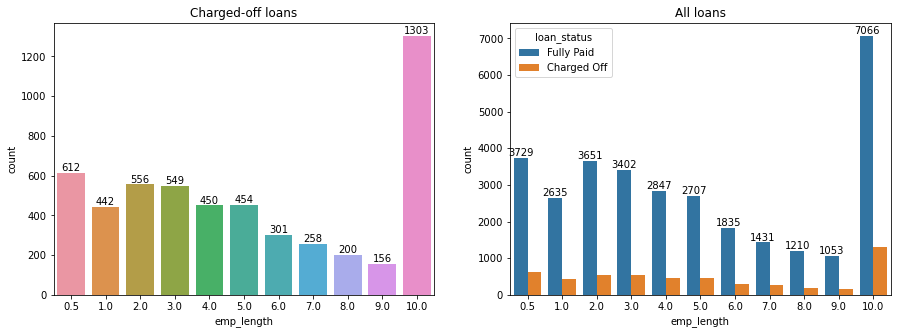

In [56]:
# Analysing emp_length
fig, axs = plt.subplots(ncols=2,sharex=True, figsize=(15,5))
axs[0].set_title('Charged-off loans')
axs[1].set_title('All loans')
ax1=sns.countplot(x='emp_length', data=df_plot, ax=axs[0])
ax2=sns.countplot(x='emp_length', hue='loan_status', data=df, ax=axs[1])
for c1,c2 in zip(ax1.containers, ax2.containers):
    ax1.bar_label(c1)
    ax2.bar_label(c2)

The total loans and charged-off loans are proportional for emp_length variable. <br>
Thus, If number of loans increase in a emp_length, the defaulters also increases for that emp_length

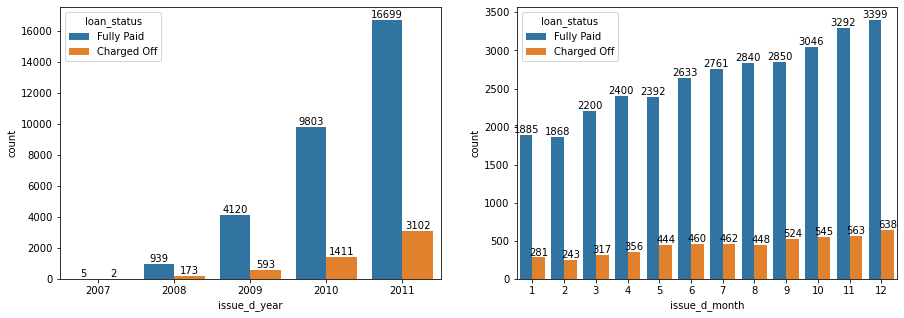

In [57]:
# Analysing issued date
fig, axs = plt.subplots(ncols=2,sharex=False, figsize=(15,5))
ax1=sns.countplot(x='issue_d_year',hue='loan_status', data=df, ax=axs[0])
ax2=sns.countplot(x='issue_d_month',hue='loan_status', data=df, ax=axs[1])
for c1,c2 in zip(ax1.containers, ax2.containers):
    ax1.bar_label(c1)
    ax2.bar_label(c2)

For each year, the total loans granted increase, also charged-off loans increases proportionally.<br>
Loans granted increses towards the end of year, increasing charged-off loans proportionally.

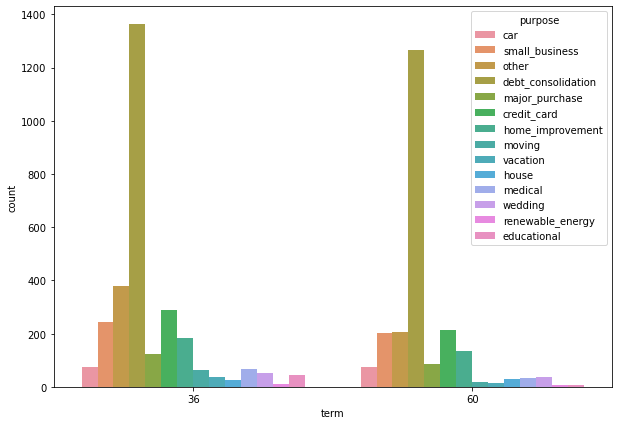

In [58]:
# Analysing term and purpose
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=df_plot)
plt.show()

Defaulters for all purposes are almost identical for both the terms.

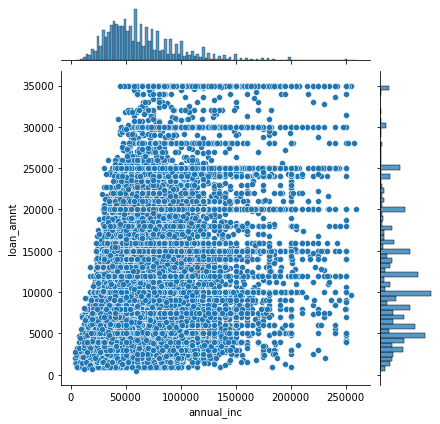

In [59]:
# Analysing anual_inc and loan_amnt
sns.jointplot('annual_inc', 'loan_amnt', df.loc[df['annual_inc']<260000])
plt.show()

Loan applicants with annual income less than 50k getting loans above 25k which is 50% of their annual income. These is a high chance for these type of loan getting defaulted.

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='annual_inc'>

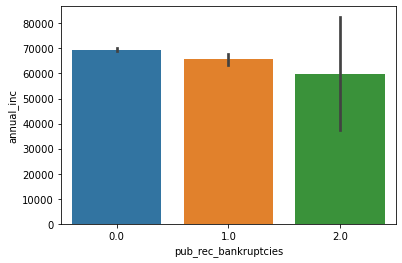

In [60]:
sns.barplot(y='annual_inc', x='pub_rec_bankruptcies', data=df)

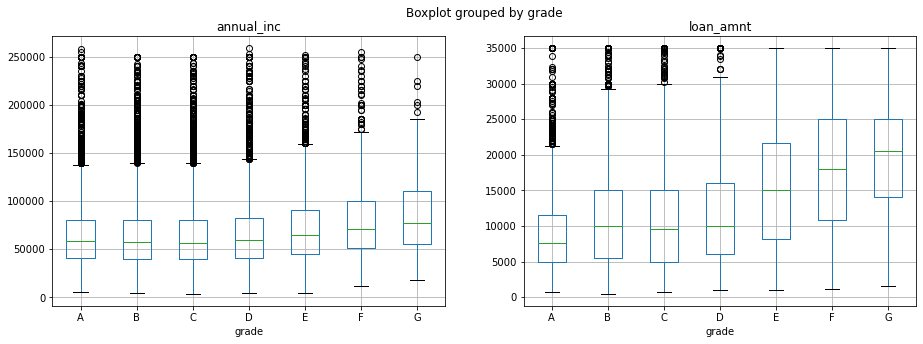

In [61]:
fig, axs = plt.subplots(ncols=2,sharex=False, figsize=(15,5))
df.loc[df['annual_inc']<260000].boxplot(column='annual_inc', by='grade',ax=axs[0])
df.boxplot(column='loan_amnt', by='grade',ax=axs[1])
plt.show()

As the grade decreases, the loan amount increases and salary also has a slightly increasing trend.<br>


<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

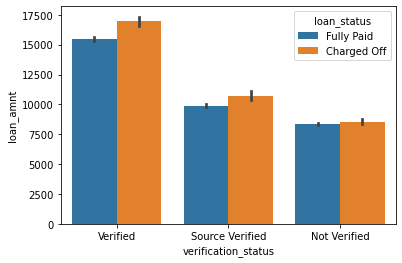

In [62]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)


Loans are getting verified if the loan_amnt increases and the charged-off loan rates are high for all types of verification_status

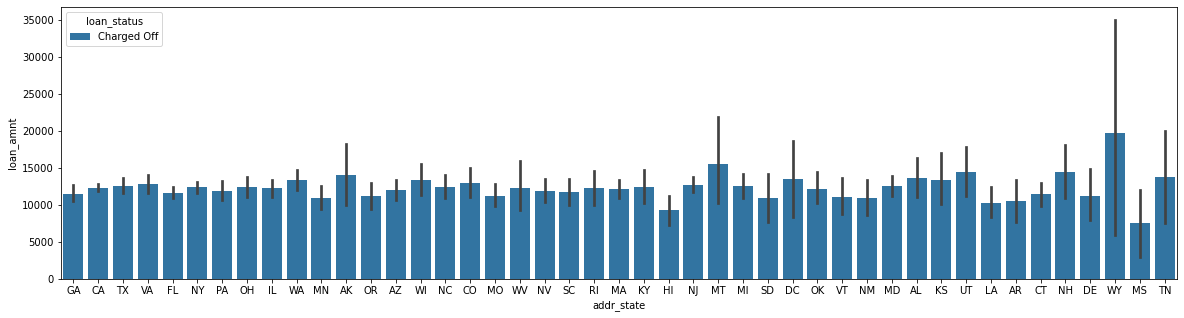

In [63]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=df_plot, estimator=np.mean)
plt.show()

Loan applicants from the state WY are having high chances to be defaulter.

<AxesSubplot:>

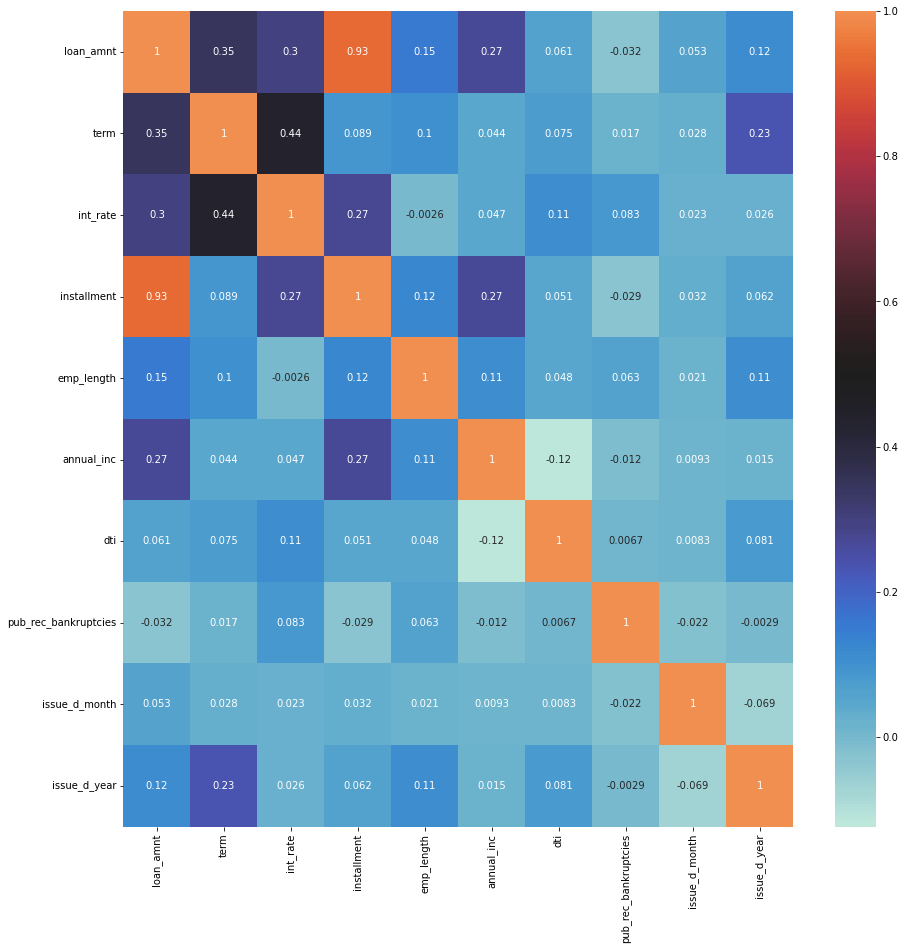

In [64]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, center=0.5)

<li>Loan_amnt and Installment have high positive correlation.
<li>Interest rate and term have are fairly correlated.
<li>Term and Interest rate are also fairly correlated.